**Importing packages**

In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Reading the dataset**

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Benkyou/datasets ML/diabetes (1).csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [9]:
df['class'],_ =pd.factorize(df['class']) 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Checking For Null values outliers etc

In [10]:
print("\n",df.info())
#no null values

#print("Pregnancies",df['Pregnancies'].unique())
#print("Glucose",df['Glucose'].unique())
#print("BloodPressure",df['BloodPressure'].unique())
#print("SkinThickness",df['SkinThickness'].unique())
#print("Insulin",df['Insulin'].unique())
#print("BMI",df['BMI'].unique())
#print("DiabetesPedigreeFunction",df['DiabetesPedigreeFunction'].unique())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

 None


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.651042
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Exploratory Data Analysis**

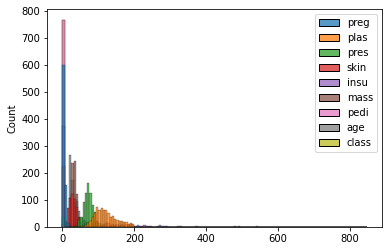

preg    -0.222
plas    -0.467
pres    -0.065
skin    -0.075
insu    -0.131
mass    -0.293
pedi    -0.174
age     -0.238
class    1.000
Name: class, dtype: float64


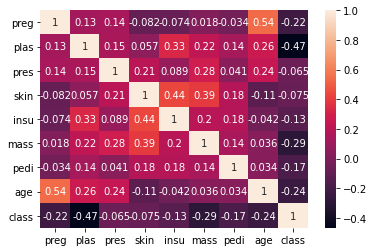

In [12]:
#df_profile = pp.ProfileReport(df)

sea.histplot(df)
plt.show()

#finding co relation  b/w target amd features

cor = df.corr().round(3)
print(cor['class'])
sea.heatmap(cor,annot=True)


Model Building

In [15]:
x = df.drop(["class"], axis = 1)
y = df["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 60)
regressor =  GaussianNB()
regressor.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy of the model - test

In [16]:
y_pred = regressor.predict(x_test)
accuracy_score(y_test, y_pred)

0.7575757575757576